# Importing Libraries

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset in Google Drive
drive_file_path = '/content/drive/My Drive/data3'

# Destination path where you want to copy the dataset
destination_path = '/content/data3'

# Copying the dataset from Google Drive to the local runtime
#shutil.copytree(drive_file_path, destination_path)



Mounted at /content/drive


In [ ]:
%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from random import shuffle
from keras.applications import VGG19
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import GRU
from keras.layers import Dense, Activation
import sys
import h5py
import urllib.request
import tarfile
import zipfile
import sys

In [ ]:
pip install opencv-python

# Downloading the Dataset

In [ ]:
def print_progress(count, max_count):
    # Percentage completion.
    pct_complete = count / max_count

    # Status-message. Note the \r which means the line should
    # overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()


In [ ]:

# Set the local directory where the dataset is stored
in_dir = "/content/drive/My Drive/data3"

# Verify the dataset directory exists
if os.path.exists(in_dir):
    print(f"Dataset directory found: {in_dir}")
else:
    print(f"Error: Dataset directory not found at {in_dir}")


Dataset directory found: /content/drive/My Drive/data3


In [ ]:

# Set the local directory where the dataset is stored
in_dir = "/content/drive/My Drive/data3"

# Verify the dataset directory exists
if os.path.exists(in_dir):
    print(f"Dataset directory found: {in_dir}")
else:
    print(f"Error: Dataset directory not found at {in_dir}")


Dataset directory found: /content/drive/My Drive/data3


In [ ]:
import os

# Define the path to the problematic file
file_to_remove = "data3/HockeyFights.zip"

# Check if the file exists and remove it
if os.path.exists(file_to_remove):
    os.remove(file_to_remove)
    print(f"Removed file: {file_to_remove}")
else:
    print(f"File not found: {file_to_remove}")

# List the files in the directory to verify removal


File not found: data3/HockeyFights.zip


Some Data Dimensions

In [ ]:
# Frame size
img_size = 224

img_size_touple = (img_size, img_size)

# Number of channels (RGB)
num_channels = 3

# Flat frame size
img_size_flat = img_size * img_size * num_channels

# Number of classes for classification (Violence-No Violence)
num_classes = 2

# Number of files to train
_num_files_train = 1

# Number of frames per video
_images_per_file = 20

# Number of frames per training set
_num_images_train = _num_files_train * _images_per_file

# Video extension
video_exts = ".avi"


Function used to get 20 frames from a video file

In [ ]:

def get_frames(current_dir, file_name):

    in_file = os.path.join(current_dir, file_name)

    images = []

    vidcap = cv2.VideoCapture(in_file)

    success,image = vidcap.read()

    count = 0

    while count<_images_per_file:

        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        res = cv2.resize(RGB_img, dsize=(img_size, img_size),
                                 interpolation=cv2.INTER_CUBIC)

        images.append(res)

        success,image = vidcap.read()

        count += 1

    resul = np.array(images)

    resul = (resul / 255.).astype(np.float16)

    return resul



Function that labels the video names

In [ ]:
def label_video_names(in_dir):

    # list containing video names
    names = []
    # list containin video labels [1, 0] if it has violence and [0, 1] if not
    labels = []


    for current_dir, dir_names,file_names in os.walk(in_dir):

        for file_name in file_names:

            if file_name[0:2] == 'fi' or file_name[0:1] == 'V':
                labels.append([1,0])
                names.append(file_name)
            elif file_name[0:2] == 'no' or file_name[0:2] == 'NV':
                labels.append([0,1])
                names.append(file_name)


    c = list(zip(names,labels))
    # Suffle the data (names and labels)
    shuffle(c)

    names, labels = zip(*c)

    return names, labels

In [ ]:

#First get the names and labels of the whole videos
names, labels = label_video_names(in_dir)

In [ ]:
#The names of the videos
names

('NV_299.mp4',
 'NV_274.mp4',
 'NV_877.avi',
 'NV_829.mp4',
 'V_640.mp4',
 'NV_308.mp4',
 'fi130_xvid.avi',
 'NV_770.mp4',
 'NV_409.mp4',
 'V_875.mp4',
 'fi364_xvid.avi',
 'V_536.mp4',
 'NV_832.mp4',
 'NV_424.mp4',
 'fi72_xvid.avi',
 'no204_xvid.avi',
 'V_662.mp4',
 'NV_73.mp4',
 'NV_255.mp4',
 'NV_453.mp4',
 'no277_xvid.avi',
 'no210_xvid.avi',
 'NV_744.mp4',
 'V_223.mp4',
 'NV_391.mp4',
 'V_941.mp4',
 'NV_210.mp4',
 'NV_401.mp4',
 'no217_xvid.avi',
 'fi220_xvid.avi',
 'NV_454.mp4',
 'V_104.mp4',
 'fi190_xvid.avi',
 'NV_750.mp4',
 'fi233_xvid.avi',
 'V_14.mp4',
 'no95_xvid.avi',
 'fi489_xvid.avi',
 'NV_861.mp4',
 'NV_998.mp4',
 'NV_891.avi',
 'V_296.mp4',
 'V_439.mp4',
 'NV_410.mp4',
 'NV_103.mp4',
 'V_425.mp4',
 'fi490_xvid.avi',
 'V_533.mp4',
 'no252_xvid.avi',
 'fi392_xvid.avi',
 'NV_542.mp4',
 'no240_xvid.avi',
 'V_336.mp4',
 'V_125.mp4',
 'V_410.mp4',
 'V_645.mp4',
 'NV_316.mp4',
 'no371_xvid.avi',
 'no364_xvid.avi',
 'fi249_xvid.avi',
 'no5_xvid.avi',
 'V_364.mp4',
 'NV_203.mp4'

# Plotting a video frames

In [ ]:
frames = get_frames(in_dir, names[999])


In [ ]:
visible_frame = (frames*255).astype('uint8')


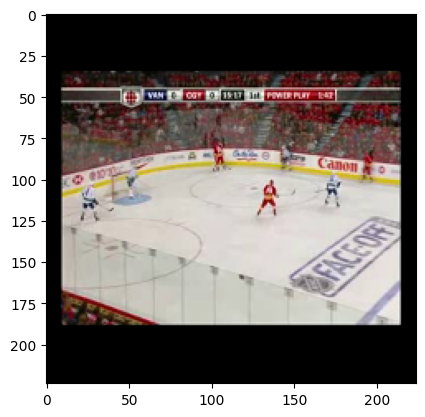

In [ ]:
plt.imshow(visible_frame[3])


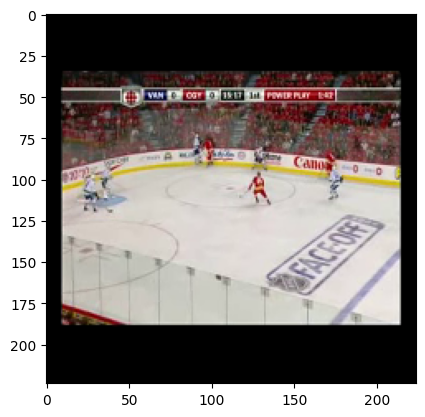

In [ ]:
plt.imshow(visible_frame[15])


# Pre-Trained Model: VGG19

The VGG19 model contains a convolutional part and a fully-connected (or dense) part which is used for classification. If include_top=True then the whole VGG19 model is downloaded which is about 528 MB

weights=‘imagenet’: This indicates that the model should use the weights that were pre-trained on the ImageNet dataset. The ImageNet dataset contains millions of labeled images across thousands of categories, making it a comprehensive resource for training robust image classification models.

In [ ]:


image_model = VGG19(include_top=True, weights='imagenet')

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Here is the model summary

In [ ]:
image_model.summary()


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

As we can see that the input size must be (224,224,3) that as we specified at the Data dimension section

In [ ]:
input_shape = image_model.input_shape[1:3]
input_shape

(224, 224)

# The VGG19 model flowchart

The following chart shows how the data flows when using the VGG19 model for Transfer Learning. First we input and process 20 video frames in batch with the VGG19 model. Just prior to the final classification layer of the VGG19 model, we save the so-called Transfer Values to a cache-file.

The reason for using a cache-file is that it takes a long time to process an image with the VGG19 model. If each image is processed more than once then we can save a lot of time by caching the transfer-values.

When all the videos have been processed through the VGG19 model and the resulting transfer-values saved to a cache file, then we can use those transfer-values as the input to LSTM neural network. We will then train the second neural network using the classes from the violence dataset (Violence, No-Violence), so the network learns how to classify images based on the transfer-values from the VGG19 model.

In [ ]:
from tensorflow.keras import backend as K
# We will use the output of the layer prior to the final
# classification-layer which is named fc2. This is a fully-connected (or dense) layer.
transfer_layer = image_model.get_layer('fc2')

image_model_transfer = Model(inputs=image_model.input,
                             outputs=transfer_layer.output)

transfer_values_size = K.int_shape(transfer_layer.output)[1]


print("The input of the VGG19 net have dimensions:",K.int_shape(image_model.input)[1:3])

print("The output of the selecter layer of VGG19 net have dimensions: ", transfer_values_size)

The input of the VGG19 net have dimensions: (224, 224)
The output of the selecter layer of VGG19 net have dimensions:  4096


A function to proccess a 20 frames from a video through the pretrained VGG19 model and return the transfered values

In [ ]:
def get_transfer_values(current_dir, file_name):

    # Pre-allocate input-batch-array for images.
    shape = (_images_per_file,) + img_size_touple + (3,)

    image_batch = np.zeros(shape=shape, dtype=np.float16)

    image_batch = get_frames(current_dir, file_name)

    # Pre-allocate output-array for transfer-values.
    # Note that we use 16-bit floating-points to save memory.
    shape = (_images_per_file, transfer_values_size)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    transfer_values = \
            image_model_transfer.predict(image_batch)

    return transfer_values

A function that generates each video through VGG19 model

In [ ]:
def proces_transfer(vid_names, in_dir, labels):


    count = 0

    tam = len(vid_names)

    # Pre-allocate input-batch-array for images.
    shape = (_images_per_file,) + img_size_touple + (3,)
    while count<tam:

        video_name = vid_names[count]

        image_batch = np.zeros(shape=shape, dtype=np.float16)

        image_batch = get_frames(in_dir, video_name)

         # Note that we use 16-bit floating-points to save memory.
        shape = (_images_per_file, transfer_values_size)
        transfer_values = np.zeros(shape=shape, dtype=np.float16)

        transfer_values = \
            image_model_transfer.predict(image_batch)

        labels1 = labels[count]

        aux = np.ones([20,2])

        labelss = labels1*aux

        yield transfer_values, labelss

        count+=1


A function to save the transfered Values for later use

In [ ]:
def make_files(n_files):

    gen = proces_transfer(names_training, in_dir, labels_training)

    numer = 1

    # Read the first chunk to get the column dtypes
    chunk = next(gen)

    row_count = chunk[0].shape[0]
    row_count2 = chunk[1].shape[0]

    with h5py.File('prueba1.h5', 'w') as f:

        # Initialize a resizable dataset to hold the output
        maxshape = (None,) + chunk[0].shape[1:]
        maxshape2 = (None,) + chunk[1].shape[1:]


        dset = f.create_dataset('data', shape=chunk[0].shape, maxshape=maxshape,
                                chunks=chunk[0].shape, dtype=chunk[0].dtype)

        dset2 = f.create_dataset('labels', shape=chunk[1].shape, maxshape=maxshape2,
                                 chunks=chunk[1].shape, dtype=chunk[1].dtype)

         # Write the first chunk of rows
        dset[:] = chunk[0]
        dset2[:] = chunk[1]

        for chunk in gen:

            if numer == n_files:

                break

            # Resize the dataset to accommodate the next chunk of rows
            dset.resize(row_count + chunk[0].shape[0], axis=0)
            dset2.resize(row_count2 + chunk[1].shape[0], axis=0)

            # Write the next chunk
            dset[row_count:] = chunk[0]
            dset2[row_count:] = chunk[1]

            # Increment the row count
            row_count += chunk[0].shape[0]
            row_count2 += chunk[1].shape[0]
            print_progress(numer, n_files)

            numer += 1

In [ ]:
def make_files_test(n_files):

    gen = proces_transfer(names_test, in_dir, labels_test)

    numer = 1

    # Read the first chunk to get the column dtypes
    chunk = next(gen)

    row_count = chunk[0].shape[0]
    row_count2 = chunk[1].shape[0]

    with h5py.File('pruebavalidation1.h5', 'w') as f:

        # Initialize a resizable dataset to hold the output
        maxshape = (None,) + chunk[0].shape[1:]
        maxshape2 = (None,) + chunk[1].shape[1:]


        dset = f.create_dataset('data', shape=chunk[0].shape, maxshape=maxshape,
                                chunks=chunk[0].shape, dtype=chunk[0].dtype)

        dset2 = f.create_dataset('labels', shape=chunk[1].shape, maxshape=maxshape2,
                                 chunks=chunk[1].shape, dtype=chunk[1].dtype)

         # Write the first chunk of rows
        dset[:] = chunk[0]
        dset2[:] = chunk[1]

        for chunk in gen:

            if numer == n_files:

                break

            # Resize the dataset to accommodate the next chunk of rows
            dset.resize(row_count + chunk[0].shape[0], axis=0)
            dset2.resize(row_count2 + chunk[1].shape[0], axis=0)

            # Write the next chunk
            dset[row_count:] = chunk[0]
            dset2[row_count:] = chunk[1]

            # Increment the row count
            row_count += chunk[0].shape[0]
            row_count2 += chunk[1].shape[0]
            print_progress(numer, n_files)

            numer += 1

# Splitting the dataset into training and testing

In [ ]:
training_set = int(len(names)*0.8)
test_set = int(len(names)*0.2)

names_training = names[0:training_set]
names_test = names[training_set:]

labels_training = labels[0:training_set]
labels_test = labels[training_set:]


Here we are going to proccess all of the frames of the videos through the VGG19 model and then saving the transfered values into the disk

In [ ]:
make_files(training_set)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
make_files_test(test_set)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_set

599

In [ ]:
training_set

2399

In [ ]:
import os

# Specify the dataset directory
dataset_dir = "/content/drive/My Drive/data3"

# Count files
total_files = sum([len(files) for r, d, files in os.walk(dataset_dir)])
print(f"Total files in dataset: {total_files}")

Total files in dataset: 2999


In [ ]:


%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from random import shuffle
from keras.applications import VGG19
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import GRU,LSTM
from keras.layers import Dense, Activation
import sys
import h5py
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense, Activation, BatchNormalization
from keras.optimizers import Adam



# Loading the cached transfer values into the memory

We have already saved all the videos transfer values into disk. But we have to load those transfer values into memory in order to train the LSTM net.

In [ ]:

def process_alldata_training():

    joint_transfer=[]
    frames_num=20
    count = 0

    with h5py.File('prueba1.h5', 'r') as f:

        X_batch = f['data'][:]
        y_batch = f['labels'][:]

    for i in range(int(len(X_batch)/frames_num)):
        inc = count+frames_num
        joint_transfer.append([X_batch[count:inc],y_batch[count]])
        count =inc

    data =[]
    target=[]

    for i in joint_transfer:
        data.append(i[0])
        target.append(np.array(i[1]))

    return data, target


In [ ]:
def process_alldata_test():

    joint_transfer=[]
    frames_num=20
    count = 0

    with h5py.File('pruebavalidation1.h5', 'r') as f:

        X_batch = f['data'][:]
        y_batch = f['labels'][:]

    for i in range(int(len(X_batch)/frames_num)):
        inc = count+frames_num
        joint_transfer.append([X_batch[count:inc],y_batch[count]])
        count =inc

    data =[]
    target=[]

    for i in joint_transfer:
        data.append(i[0])
        target.append(np.array(i[1]))

    return data, target

In [ ]:
data, target = process_alldata_training()



In [ ]:
data_test, target_test = process_alldata_test()


# Defining the LSTM model

LSTM is an advanced Type of RNN designed to handle long-term dependencies more effectively.

Define LSTM architecture:

When defining the LSTM architecture we have to take into account the dimensions of the transfer values. From each frame the VGG19 network obtains as output a vector of 4096 transfer values. From each video we are processing 20 frames so we will have 20 x 4096 values per video. The classification must be done taking into account the 20 frames of the video. If any of them detects violence, the video will be classified as violent.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Activation, Softmax, Multiply
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random
import numpy as np
from tensorflow.keras.optimizers import Adam

import numpy as np, random
def set_seeds(seed=1):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds(1)


chunk_size = 4096
n_chunks = 20
rnn_size = 128


class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()
        self.attention_dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        # inputs.shape = (batch_size, time_steps, features)
        score = tf.nn.softmax(self.attention_dense(inputs), axis=1)
        context = tf.reduce_sum(inputs * score, axis=1)  # shape: (batch_size, features)
        return context


# Set seeds
set_seeds(1)

# Input layer
input_seq = Input(shape=(n_chunks, chunk_size))

# First LSTM
x = LSTM(rnn_size, return_sequences=True)(input_seq)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Second LSTM
x = LSTM(rnn_size, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Third LSTM
x = LSTM(rnn_size, return_sequences=True)(x)  # We keep return_sequences for attention
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Attention
attention = Attention()(x)  # Output shape: (batch_size, features)

# Dense layers after attention
x = Dense(1024)(attention)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)


x = Dense(256)(attention)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(64)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Output layer
output = Dense(2, activation='softmax')(x)

# Model
model_with_attention = Model(inputs=input_seq, outputs=output)
# Optimizer
optimizer = Adam(learning_rate=0.0000007)
learning_rate = 0.0001
# Compile
model_with_attention.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Summary
model_with_attention.summary()

# Optimizer
# learning_rate = 0.0001
# optimizer = Adam(learning_rate=0.0001)

# Callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss", patience=10, restore_best_weights=True)

reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.1, patience=7, verbose=1)
'''
lr = 0,0001
factor = 1
patience = 10
'''

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 20, 4096)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 20, 128)             │       2,163,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 20, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 20, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_2 (Attention)              │ (None, 128)                 │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │              

 Total params: 2,503,875 (9.55 MB)

 Trainable params: 2,502,339 (9.55 MB)

 Non-trainable params: 1,536 (6.00 KB)

'\nlr = 0,0001 \nfactor = 1\npatience = 10\n'

## Model Training


In [ ]:
epoch = 250
batchS = 64

history5 = model_with_attention.fit(np.array(data[0:1950]), np.array(target[0:1950]), epochs=epoch,
                    batch_size=batchS,validation_data=(np.array(data[1950:]),np.array(target[1950:])),
                      callbacks = [early_stopping_callback,reduce_lr_callback])

Epoch 1/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5186 - loss: 1.1729 - val_accuracy: 0.4878 - val_loss: 0.6935 - learning_rate: 1.0000e-04
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5286 - loss: 1.0822 - val_accuracy: 0.6036 - val_loss: 0.6921 - learning_rate: 1.0000e-04
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5587 - loss: 0.9589 - val_accuracy: 0.5434 - val_loss: 0.6876 - learning_rate: 1.0000e-04
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5655 - loss: 0.9234 - val_accuracy: 0.5189 - val_loss: 0.6835 - learning_rate: 1.0000e-04
Epoch 5/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5556 - loss: 0.9025 - val_accuracy: 0.5880 - val_loss: 0.6639 - learning_rate: 1.0000e-04
Epoch 6/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6160 - loss: 0.8342 - val_accuracy: 0.6971 - val_loss: 0.6249 - learning_rate: 1.0000e-04
Epoch 7/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 

# Model testing an evaluating

We are here testing the performance of the model by sevral metrics , and we have assured the test set have not been seen by the model

In [ ]:
result=model_with_attention.evaluate(np.array(data[0:1950]),np.array(target[0:1950]))

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9483 - loss: 0.1294


In [ ]:
result=model_with_attention.evaluate(np.array(data[1950:]),np.array(target[1950:]))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9324 - loss: 0.2096


In [ ]:
result = model_with_attention.evaluate(np.array(data_test), np.array(target_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9002 - loss: 0.3053


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

# Get the predictions for your test data
y_pred = model_with_attention.predict(np.array(data_test))

y_pred = (y_pred > 0.5).astype("int32")
# Calculate the confusion matrix
mcm = multilabel_confusion_matrix(target_test, y_pred)

print("Confusion Matrix:")
print(mcm)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Confusion Matrix:
[[[236  45]
  [ 19 299]]

 [[299  19]
  [ 45 236]]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(target_test, y_pred, target_names=['NonViolence', 'Violence']))

Classification Report:
              precision    recall  f1-score   support

 NonViolence       0.87      0.94      0.90       318
    Violence       0.93      0.84      0.88       281

   micro avg       0.89      0.89      0.89       599
   macro avg       0.90      0.89      0.89       599
weighted avg       0.90      0.89      0.89       599
 samples avg       0.89      0.89      0.89       599



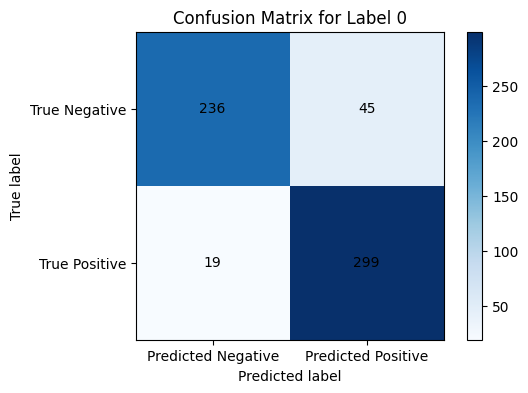

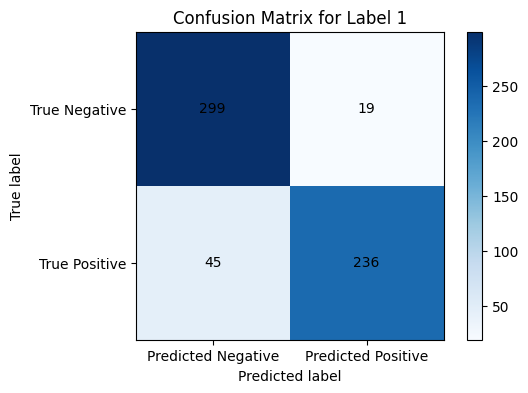

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the confusion matrix for each label
for i, cm in enumerate(mcm):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['True Negative', 'True Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for Label {i}')

    # Add text annotations
    for y in range(cm.shape[0]):
        for x in range(cm.shape[1]):
            plt.text(x, y, f'{cm[y, x]}', ha='center', va='center', color='black')

    plt.show()

# Showing the accuracy and loss over epochs  

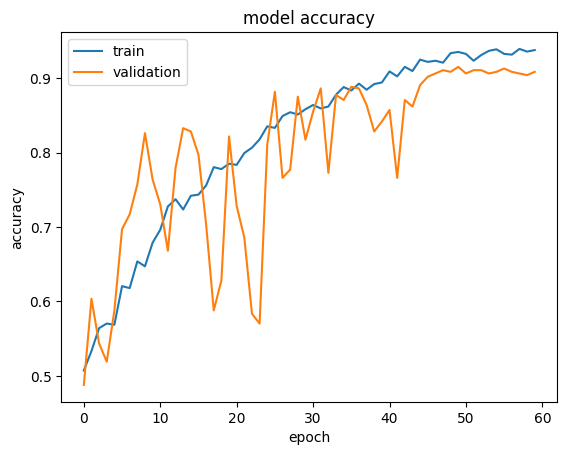

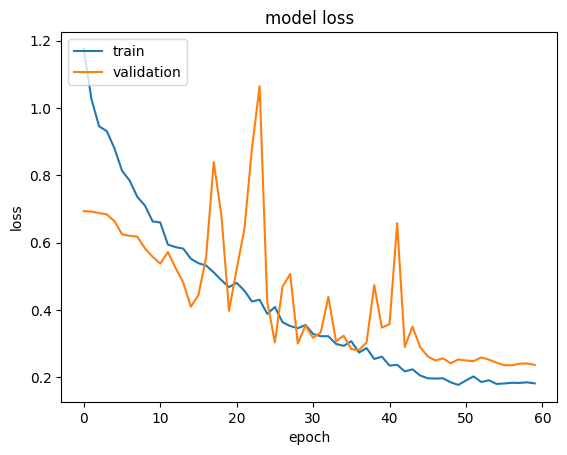

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()

# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
result=model_with_attention.evaluate(np.array(data_test),np.array(target_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9002 - loss: 0.3053
